In [146]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
import numpy as np

In [7]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [16]:
query = """
select count(*)
from ldn_listings
"""
df = ph.read_clickhouse(query,connection=connection)

In [17]:
df

,count()
0,85207


In [18]:
query_2 = """
select
    toFloat32OrNull(replaceRegexpAll(price,'[$,]', '')) as price,
    room_type
from ldn_listings
limit 1000
"""
df_2 = ph.read_clickhouse(query_2,connection=connection)

In [19]:
df_2

,price,room_type
0,65.0,Private room
1,100.0,Entire home/apt
2,300.0,Entire home/apt
3,150.0,Private room
4,65.0,Entire home/apt
...,...,...
995,110.0,Entire home/apt
996,110.0,Entire home/apt
997,65.0,Private room
998,100.0,Entire home/apt


In [26]:
df_2.groupby('room_type').quantile(.75)

,price
room_type,
Entire home/apt,160.00
Hotel room,157.00
Private room,70.00
Shared room,69.25


In [36]:
query_3 = """
select
    toFloat32OrNull(replaceRegexpAll(price,'[$,]', '')) as price,
    room_type,
    toFloat32OrNull(review_scores_rating) as review_scores_rating
from ldn_listings
where review_scores_rating is not null
limit 1000
"""
df_3 = ph.read_clickhouse(query_3,connection=connection)

In [37]:
df_3

,price,room_type,review_scores_rating
0,65.0,Private room,97.0
1,100.0,Entire home/apt,96.0
2,300.0,Entire home/apt,94.0
3,65.0,Entire home/apt,93.0
4,29.0,Private room,96.0
...,...,...,...
995,165.0,Entire home/apt,100.0
996,99.0,Private room,93.0
997,45.0,Private room,100.0
998,20.0,Private room,88.0


In [40]:
data_3 = df_3.groupby('room_type').agg({'price' : 'mean', 'review_scores_rating' :'mean'})

In [41]:
data_3

,price,review_scores_rating
room_type,,
Entire home/apt,135.882950,93.568787
Hotel room,134.000000,92.500000
Private room,54.642437,94.766205
Shared room,21.000000,90.000000


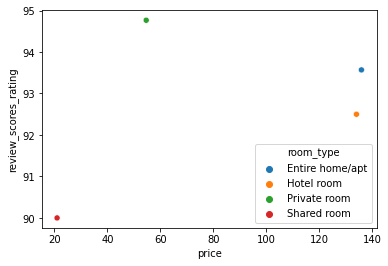

In [42]:
sns.scatterplot(data=data_3, x='price',y='review_scores_rating', hue='room_type')

In [99]:
query_4 = """
select
    distinct host_id,
    host_verifications 
from ldn_listings
where experiences_offered != 'none'
"""
df_4 = ph.read_clickhouse(query_4,connection=connection)

In [100]:
df_4

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [101]:
df_4.host_verifications.apply(lambda x : x.strip('[').strip(']').split(', '))

0       ['email', 'phone', 'facebook', 'reviews', 'off...
1       ['email', 'phone', 'reviews', 'jumio', 'govern...
2       ['email', 'phone', 'jumio', 'selfie', 'governm...
3       ['email', 'phone', 'manual_offline', 'jumio', ...
4       ['email', 'phone', 'reviews', 'offline_governm...
                              ...                        
1356    ['email', 'phone', 'reviews', 'jumio', 'govern...
1357    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1358    ['email', 'phone', 'reviews', 'jumio', 'govern...
1359    ['email', 'phone', 'google', 'reviews', 'jumio...
1360    ['email', 'phone', 'reviews', 'manual_offline'...
Name: host_verifications, Length: 1361, dtype: object

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [85]:
gg = df_4.explode('host_verifications')

In [86]:
gg

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [87]:
gg.groupby('host_verifications').count()

,host_id
host_verifications,
"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'government_id']",3
"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'offline_government_id', 'government_id', 'work_email']",1
"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'offline_government_id', 'government_id']",1
"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']",1
"['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",1
...,...
"['phone', 'reviews', 'jumio', 'selfie', 'government_id', 'identity_manual', 'work_email']",1
"['phone', 'reviews', 'jumio', 'selfie', 'government_id', 'identity_manual']",2
"['phone', 'reviews', 'offline_government_id', 'government_id']",1


In [73]:
df_4.explode('host_verifications')

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [95]:
ga = df_4.host_verifications.apply(lambda x : x.strip('[').strip(']').split(', ')).explode()

In [96]:
ga

0                       'email'
0                       'phone'
0                    'facebook'
0                     'reviews'
0       'offline_government_id'
                 ...           
1360                    'phone'
1360                  'reviews'
1360           'manual_offline'
1360                    'jumio'
1360            'government_id'
Name: host_verifications, Length: 7976, dtype: object

In [98]:
ga.groupby('host_verifications').count()

KeyError: 'host_verifications'

In [103]:
d = {'da' : df_4.host_verifications.apply(lambda x : x.strip('[').strip(']').split(', ')).explode() }

In [104]:
test = pd.DataFrame(data=d)

In [105]:
test

,da
0,'email'
0,'phone'
0,'facebook'
0,'reviews'
0,'offline_government_id'
...,...
1360,'phone'
1360,'reviews'
1360,'manual_offline'
1360,'jumio'


In [107]:
test.groupby('da').agg({'da':'count'})

,da
da,
'email',1345
'facebook',270
'google',34
'government_id',1196
'identity_manual',227
'jumio',1115
'kba',27
'manual_offline',70
'manual_online',16


In [115]:
query_5 = """
select
    neighbourhood_cleansed,
    experiences_offered,
    count(experiences_offered) as experiences_count
from ldn_listings
where experiences_offered != 'none'
group by neighbourhood_cleansed,experiences_offered
order by experiences_count desc
limit 100
"""
df_5 = ph.read_clickhouse(query_5,connection=connection)

In [116]:
df_5

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Hackney,family,61
1,Tower Hamlets,business,58
2,Westminster,business,50
3,Hackney,social,49
4,Hammersmith and Fulham,business,48
...,...,...,...
95,Redbridge,social,2
96,Barking and Dagenham,social,2
97,Newham,romantic,1
98,Bexley,business,1


In [117]:
gaga = df_5.pivot(index='neighbourhood_cleansed',columns='experiences_offered',values='experiences_count')

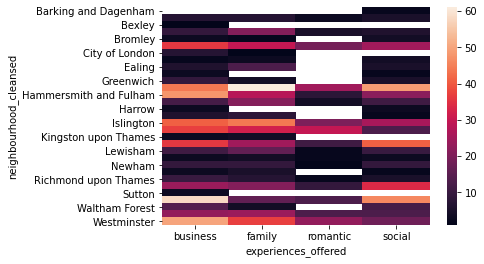

In [118]:
sns.heatmap(gaga)
sns.cubehelix_palette(as_cmap=True)

In [124]:
query_6 = """
select
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$,]','')) as price,
    experiences_offered
from ldn_listings
where experiences_offered != 'none'
"""
df_6 = ph.read_clickhouse(query_6,connection=connection)

In [132]:
df_6

,room_type,price,experiences_offered
0,Private room,65.0,business
1,Entire home/apt,100.0,romantic
2,Private room,150.0,business
3,Private room,45.0,business
4,Private room,25.0,business
...,...,...,...
1543,Entire home/apt,100.0,family
1544,Entire home/apt,125.0,business
1545,Entire home/apt,185.0,business
1546,Entire home/apt,110.0,business


In [139]:
dd = df_6.groupby('room_type',as_index=False).agg({'price' : 'sum'})

In [140]:
dd

,room_type,price
0,Entire home/apt,146088.0
1,Hotel room,449.0
2,Private room,34945.0
3,Shared room,372.0


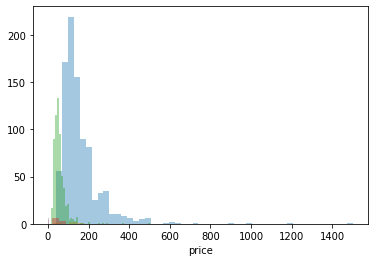

In [147]:
sns.distplot(df_6.query("room_type=='Entire home/apt'").price, kde=False)
sns.distplot(df_6.query("room_type=='Hotel room'").price, kde=False)
sns.distplot(df_6.query("room_type=='Private room'").price, kde=False)
sns.distplot(df_6.query("room_type=='Shared room'").price, kde=False)
sns.distplot(np.log(df_6.query("room_type=='Entire home/apt'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Hotel room'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Private room'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Shared room'").price), kde=False)

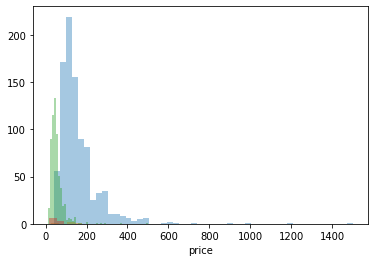

In [148]:
sns.distplot(df_6.query("room_type=='Entire home/apt'").price, kde=False)
sns.distplot(df_6.query("room_type=='Hotel room'").price, kde=False)
sns.distplot(df_6.query("room_type=='Private room'").price, kde=False)
sns.distplot(df_6.query("room_type=='Shared room'").price, kde=False)

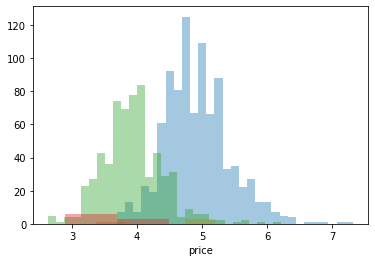

In [151]:
sns.distplot(np.log(df_6.query("room_type=='Entire home/apt'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Hotel room'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Private room'").price), kde=False)
sns.distplot(np.log(df_6.query("room_type=='Shared room'").price), kde=False)

In [163]:
query_7 = """
select
    room_type,
    toFloat32OrNull(replaceRegexpAll(price,'[$,]','')) as price,
    first_review
from ldn_listings
where first_review > '2010-01-01'
limit 1000
"""
df_7 = ph.read_clickhouse(query_7,connection=connection)

In [164]:
df_7

,room_type,price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [170]:
df_7['ga'] = df_7['first_review'].apply(lambda x: x[:-6])

In [173]:
df_7 = df_7.sort_values('ga') 

In [174]:
df_7

,room_type,price,first_review,ga
0,Private room,65.0,2010-08-18,2010
44,Private room,55.0,2010-12-31,2010
39,Private room,75.0,2010-12-20,2010
38,Entire home/apt,78.0,2010-10-26,2010
33,Private room,45.0,2010-10-06,2010
...,...,...,...,...
887,Private room,21.0,2019-05-01,2019
277,Private room,105.0,2019-05-23,2019
431,Private room,35.0,2019-03-23,2019
12,Private room,39.0,2020-02-08,2020


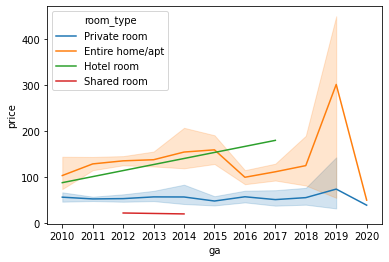

In [175]:
sns.lineplot(data=df_7,x='ga',y='price', hue='room_type')